In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [32]:
# Change working Directory
os.chdir('../Data Files')

#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [33]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

Shape of the dataframe: (155, 2)


In [34]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)




Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [35]:
# Function for Sigle exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat



In [36]:
# Effect of alpha and beta
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 1)

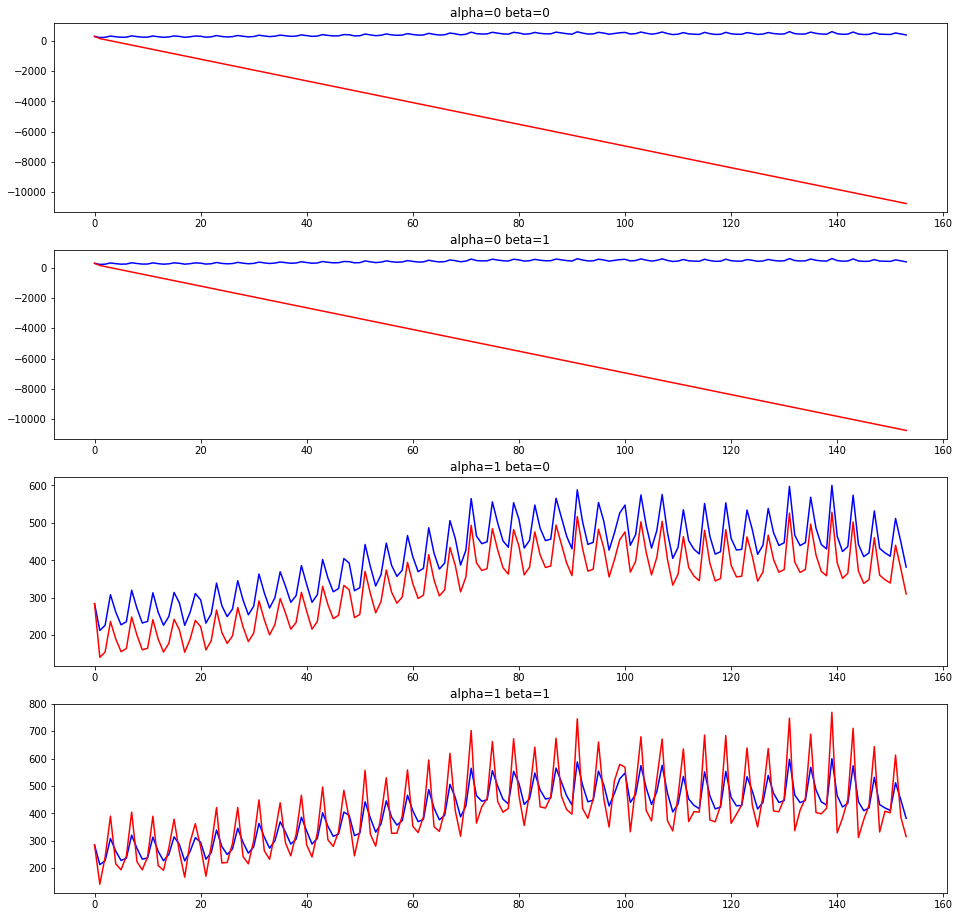

In [37]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(4,1,1)
beer_df['Beer_Prod'].plot(color='b',ax=ax)
beer_df['DEF00'].plot(ax=ax,color='r')
ax.set_title('alpha=0 beta=0')
ax = fig.add_subplot(4,1,2)
beer_df['Beer_Prod'].plot(color='b',ax=ax)
beer_df['DEF01'].plot(ax=ax, color='r')
ax.set_title('alpha=0 beta=1')
ax = fig.add_subplot(4,1,3)
beer_df['Beer_Prod'].plot(color='b',ax=ax)
beer_df['DEF10'].plot(ax=ax, color='r')
ax.set_title('alpha=1 beta=0')
ax = fig.add_subplot(4,1,4)
beer_df['Beer_Prod'].plot(color='b',ax=ax)
beer_df['DEF11'].plot(ax=ax, color='r')
ax.set_title('alpha=1 beta=1')
plt.savefig('../plots/ch3/B07887_01_14.png', format='png', dpi=300)


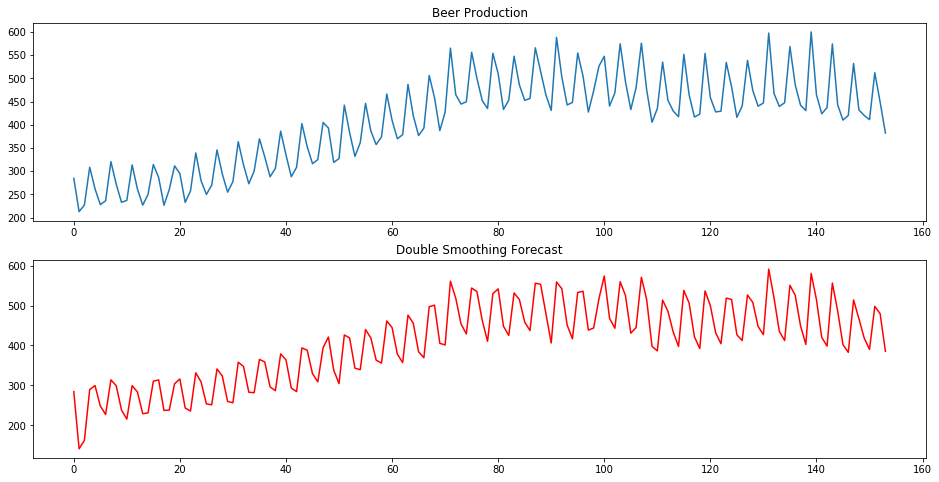

In [44]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.6, 0.8)

### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(2,1,1)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('../plots/ch3/B07887_02_14.png', format='png', dpi=300)


In [45]:
# Single vs Double Forecast value
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F


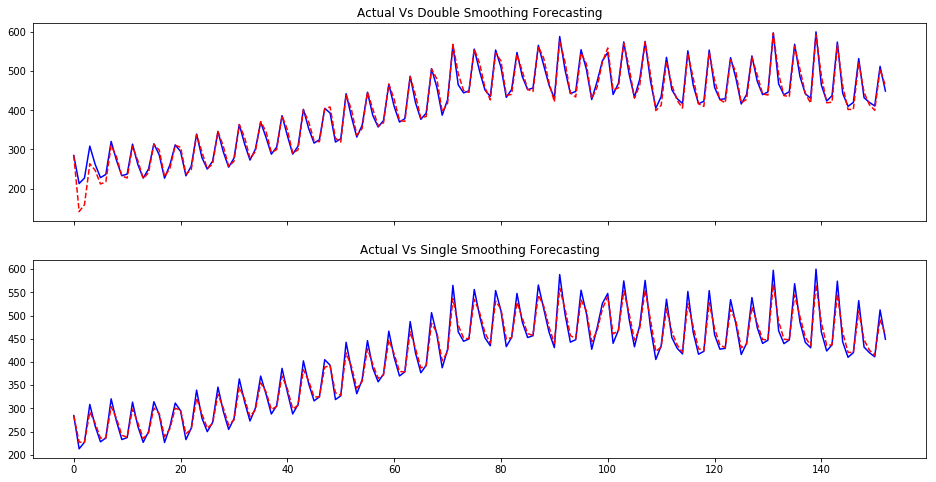

In [49]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.8, 0.3)
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.8)
### Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(16, 8)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')
plt.savefig('../plots/ch3/B07887_03_14.png', format='png', dpi=300)


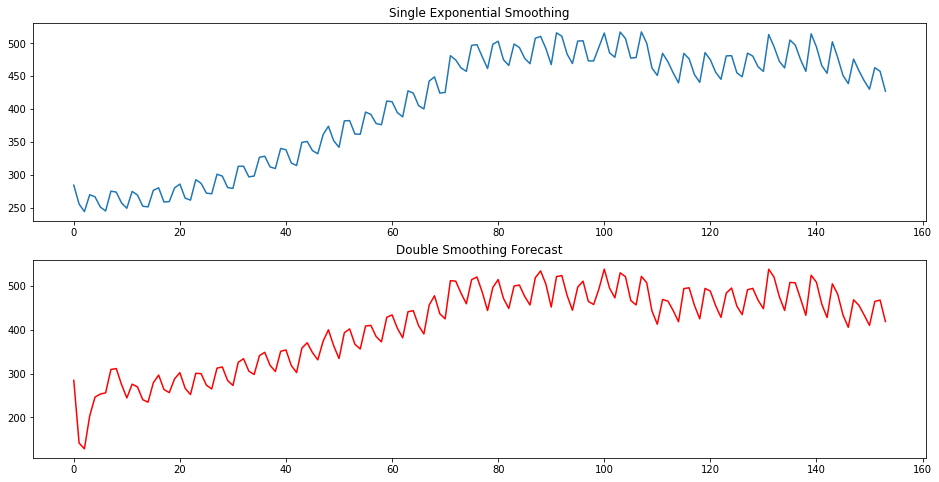

In [41]:
# Plot single and double exponential smoothing
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(2,1,1)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('../plots/ch3/B07887_04_14.png', format='png', dpi=300)### Plot Single Exponential Smoothing forecasted value


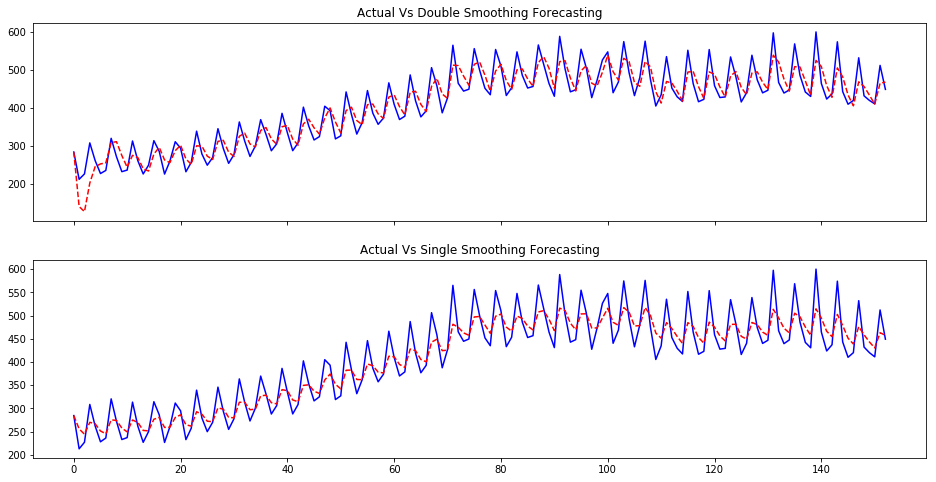

In [43]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(16, 8)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')
plt.savefig('../plots/ch3/B07887_05_14.png', format='png', dpi=300)


\begin{equation}
\hat{x}_{t+1} = F_t + T_t 
\end{equation}

\begin{equation}
F_{t+1} = \alpha x_t + (1-\alpha)(F_{t-1} + T_{t-1})  
\end{equation}

\begin{equation}
T_{t+1} = \beta(F_t - F_{t-1}) + (1-\beta)(T_{t-1})  
\end{equation}